Cost is : 19608941954.06892
Cost is : 1823565936.4879372
Cost is : 1684378113.7331765
Cost is : 1577262788.826465
Cost is : 1494558906.4439476
Cost is : 1430463561.8589582
Cost is : 1380565961.9333205
Cost is : 1341512390.2429926
Cost is : 1310751925.2927365
Cost is : 1286343432.7585678


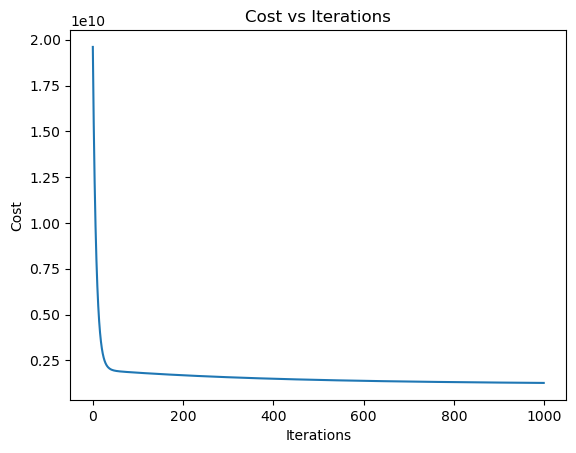

Test error is : 3370479.3481192784 %
Test Accuracy is : -3370379.3481192784 %


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_data = train.values     #converts df to nparray
Y = train_data[:, -1].reshape(train_data.shape[0], 1)   #reshape is used to make Y a column vector
X = train_data[:, :-1]
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]
X = np.vstack((np.ones((X.shape[0], )), X.T)).T      #to make sure w1*x1,w2*x2 and so on by adding a column of 1's
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

def regression(X,Y,alpha,iterations):
    m = Y.size
    W = np.zeros((X.shape[1],1))
    B = 0
    cost_list = []

    for i in range(iterations):
        y_prediction= np.dot(X,W) + B
        cost = (1/(2*m))*np.sum(np.square(y_prediction - Y))
        W_slope = (1/m)*np.dot(X.T, y_prediction - Y)
        B_slope = (1/m)*(y_prediction - Y)
        W = W - alpha*W_slope
        B = B - alpha*B_slope

        cost_list.append(cost)
        if (i %(iterations/ 10) == 0):
            print("Cost is :", cost)

    return W,cost_list


W, cost_list = regression(X, Y, alpha =0.000000005,iterations=1000)

plt.plot(range(len(cost_list)), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

